In [22]:
import xarray as xr
import geopandas as gpd

/home/ayx374/.local/easybuild/software/2020/avx2/MPI/gcc9/openmpi4/geo-stack/2022a/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [24]:
response_units = gpd.read_file('./summa_bowatbanff_2008_2013/response_units/response_units_geometry.geojson')
response_units

,geometry
0,"POLYGON ((-116.25208 51.71042, -116.24292 51.7..."
1,"POLYGON ((-116.47042 51.73542, -116.46708 51.7..."
2,"POLYGON ((-116.03125 51.50458, -116.03042 51.5..."
3,"POLYGON ((-116.11792 51.49708, -116.10625 51.4..."
4,"POLYGON ((-115.93875 51.43542, -115.93792 51.4..."
5,"POLYGON ((-115.64292 51.21042, -115.64208 51.2..."
6,"POLYGON ((-115.76708 51.27125, -115.76125 51.2..."
7,"POLYGON ((-115.81292 51.22375, -115.81208 51.2..."
8,"POLYGON ((-115.65792 51.16458, -115.65708 51.1..."


In [20]:
response_attr = xr.open_dataset('./summa_bowatbanff_2008_2013/response_units/response_units.nc')
response_attr

<xarray.Dataset>
Dimensions:               (landclass: 10, index: 9, soil: 4)
Coordinates:
  * landclass             (landclass) int8 1 7 8 9 10 11 13 15 16 17
  * index                 (index) float64 8.0 9.0 6.0 7.0 5.0 1.0 3.0 4.0 2.0
  * soil                  (soil) float32 0.0 3.0 8.0 12.0
Data variables:
    landclass_fraction    (index, landclass) float64 ...
    tax_usda_fraction     (index, soil) float64 ...
    down_id               (index) float64 ...
    tax_usda_count_mode   (index) float32 ...
    elevtn_mean           (index) float32 ...
    landclass_count_mode  (index) int8 ...
    spatial_ref           int32 ...

In [3]:
ds_results = xr.open_dataset('./summa_bowatbanff_2008_2013/output/test_hydromt_summa_timestep.nc')
ds_results

<xarray.Dataset>
Dimensions:              (time: 52608, hru: 9, gru: 9)
Coordinates:
  * time                 (time) datetime64[ns] 2008-01-01 ... 2013-12-31T23:0...
  * hru                  (hru) int64 8 9 6 7 5 1 3 4 2
  * gru                  (gru) int64 8 9 6 7 5 1 3 4 2
Data variables:
    pptrate              (time, hru) float64 ...
    airtemp              (time, hru) float64 ...
    latitude             (hru) float64 ...
    longitude            (hru) float64 ...
    averageRoutedRunoff  (time, gru) float64 ...
    hruId                (hru) int64 ...
    gruId                (gru) int64 ...
Attributes: (12/32)
    summaVersion:     undefined
    buildTime:        Wed Sep  7 12:59:38 EDT 2022
    gitBranch:        mesh-on-copernicus-0-g41db825
    gitHash:          41db8250b9dd565a81e70e634075e6eaebca07d3
    soilCatTbl:       ROSETTA
    vegeParTbl:       MODIFIED_IGBP_MODIS_NOAH
    ...               ...
    compaction:       anderson
    thCondSnow:       jrdn1991
    thCondSoil:       funcSoilWet
    spatial_gw:       localColumn
    subRouting:       timeDlay
    notPopulatedYet:  notPopulatedYet

In [4]:
runoff = ds_results.sortby(['gru','hru']).averageRoutedRunoff
runoff

<xarray.DataArray 'averageRoutedRunoff' (time: 52608, gru: 9)>
[473472 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01 ... 2013-12-31T23:00:00.000013312
  * gru      (gru) int64 1 2 3 4 5 6 7 8 9
Attributes:
    long_name:  routed runoff (instant)
    units:      m s-1

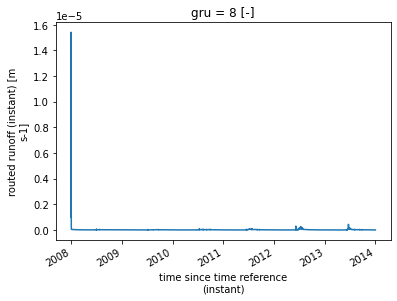

In [11]:
runoff.sel(gru=8).plot()

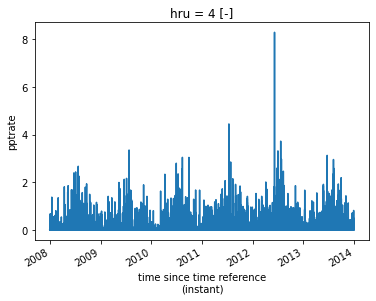

In [17]:
(ds_results.pptrate.sel(hru=4)*3600).plot()

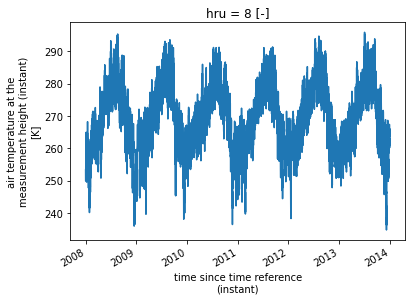

In [12]:
ds_results.airtemp.sel(hru=8).plot()